<a href="https://colab.research.google.com/github/ahnafalfariza/Machine-Learning/blob/master/k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

errorTrain = [[],[],[],[],[]]
accuracyTrain = [[],[],[],[],[]]
errorTest = [[],[],[],[],[]]
accuracyTest = [[],[],[],[],[]]

In [0]:
def get_data(url):
    x=[]
    data = pd.read_csv(url)
    for i, row in data.iterrows():
        x.append([float(row[i]) for i in range (len(row)-1)])
    return x

def get_target(url):
    target = []
    data = pd.read_csv(url)
    for i, row in data.iterrows():
        if (row[4]=='setosa'):
            target.append([0,0])
        elif (row[4]=='versicolor'):
            target.append([0,1])
        elif (row[4]=='virginica'):
            target.append([1,0])
    return target

def getOutput(data, theta, bias):
    return np.dot(data,theta)+bias

def signoid(x):
    return 1 / (1 + np.exp(-x))

def rand_numb(n=1):
    arr = []
    for i in range(n):
        arr.append(np.random.random_sample())
    return arr

def rand():
    return np.random.random_sample()

def sliceTestData(n, data, k):
    lengthFold = int(len(data)/k)
    return data[n*lengthFold:(n+1)*lengthFold]

def sliceTrainData(n, data, k):
    lengthFold = int(len(data)/k)
    return data[:n*lengthFold] + data[(n+1)*lengthFold:]

def predict(x):
    p=0
    if x >= 0.5:
        p = 1
    return p

def error(prediction, target):
    return (prediction-target)**2
    
def deltatheta(prediction, target, attr):
    return (2*(prediction-target)*(1-prediction)*prediction*attr)

def deltabias(prediction, target):
    return (2*(prediction-target)*(1-prediction)*prediction)

def getAverage(data):
    datalength = len(data[0])
    average = []
    for i in range(datalength):
        x = 0
        for j in range(len(data)):
            x+=data[j][i]
        average.append(x/len(data))
    return average

In [0]:
def kfold(k,data,target,epoch,l_rate):
    theta1=rand_numb(4)
    theta2=rand_numb(4)
    bias1=rand()
    bias2=rand()

    for n in range(k):
        theta1=rand_numb(4)
        theta2=rand_numb(4)
        bias1=rand()
        bias2=rand()

        for m in range (epoch):
            errorsTrain1=0
            errorsTrain2=0
            errorsTest1=0
            errorsTest2=0
            accTrain=0
            accTest=0

            testData = sliceTestData(n,data,k)
            trainData = sliceTrainData(n,data,k)
            testTarget = sliceTestData(n,target,k)
            trainTarget = sliceTrainData(n,target,k)

            # train
            for i in range(len(trainData)):
                #get prediction
                prediction1 = signoid(getOutput(trainData[i],theta1,bias1))
                prediction2 = signoid(getOutput(trainData[i],theta2,bias2))
            
                #count accuracy
                if predict(prediction1)==trainTarget[i][0] and predict(prediction2)==trainTarget[i][1]:
                    accTrain+=1

                #count error
                errorsTrain1+=error(prediction1, trainTarget[i][0])
                errorsTrain2+=error(prediction2, trainTarget[i][1])

                #update theta
                for j in range(4):
                    theta1[j]-=l_rate*deltatheta(prediction1,trainTarget[i][0],trainData[i][j])
                    theta2[j]-=l_rate*deltatheta(prediction2,trainTarget[i][1],trainData[i][j])
     
                #update bias
                bias1-=deltabias(prediction1,trainTarget[i][0])
                bias2-=deltabias(prediction2,trainTarget[i][1])

            # test
            for i in range(len(testData)):
                #activation function
                prediction1 = signoid(getOutput(trainData[i],theta1,bias1))
                prediction2 = signoid(getOutput(trainData[i],theta2,bias2))

                #count accuracy test data
                if predict(prediction1)==testTarget[i][0] and predict(prediction2)==testTarget[i][1]:
                    accTest+=1

                #count error test data
                errorsTest1+=error(prediction1, testTarget[i][0])
                errorsTest2+=error(prediction2, testTarget[i][1])

            errorTrain[n].append((errorsTrain1+errorsTrain2)/(2*len(trainData)))
            accuracyTrain[n].append(accTrain/len(trainData))
            errorTest[n].append((errorsTest1+errorsTest2)/(2*len(testData)))
            accuracyTest[n].append((accTest/len(testData)))

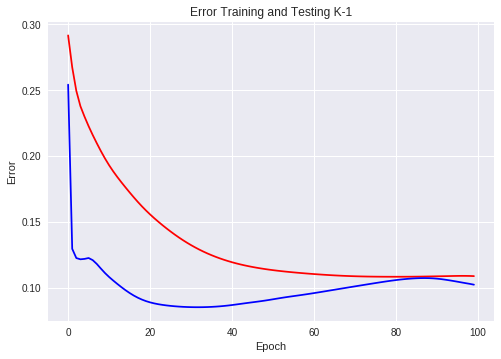

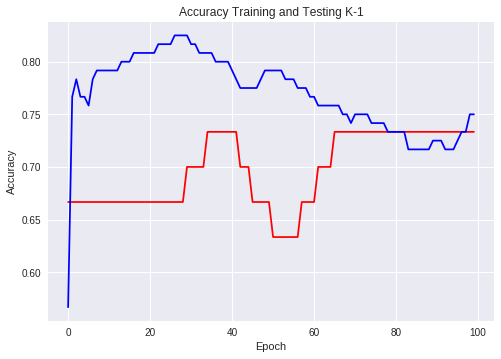

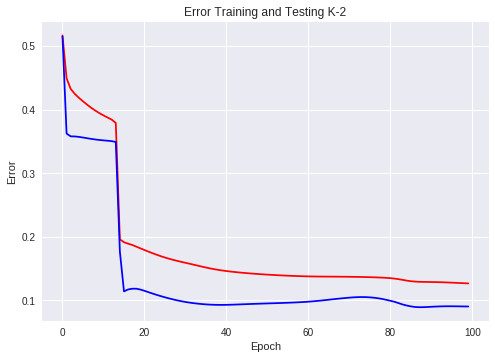

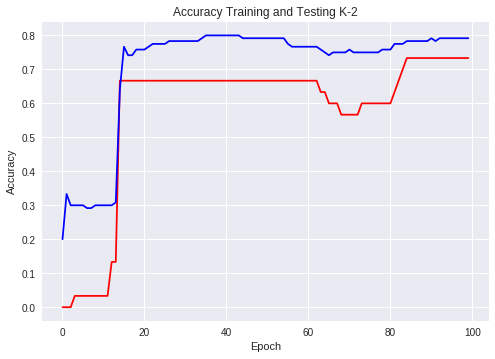

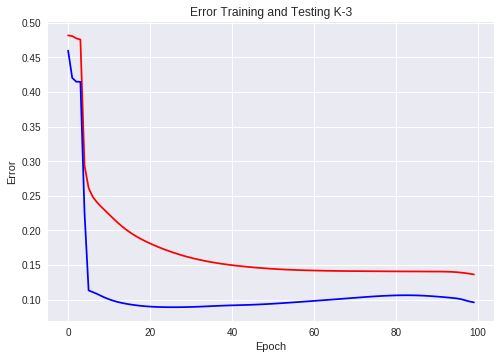

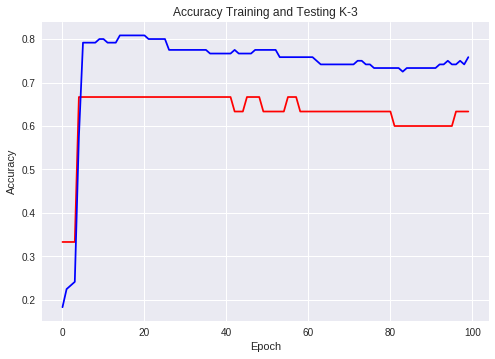

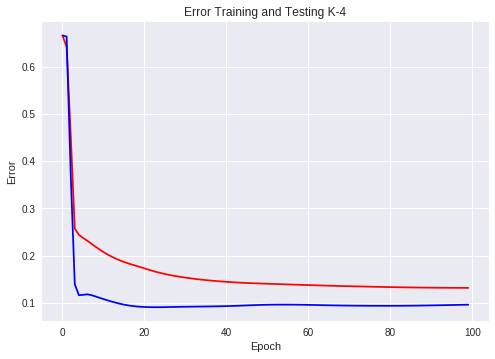

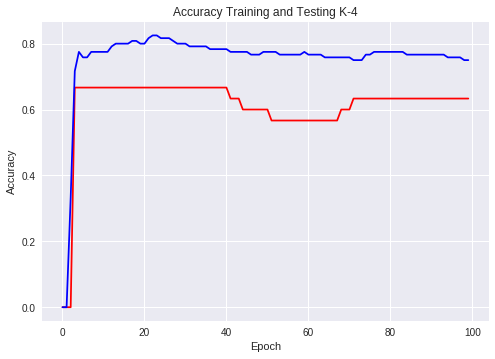

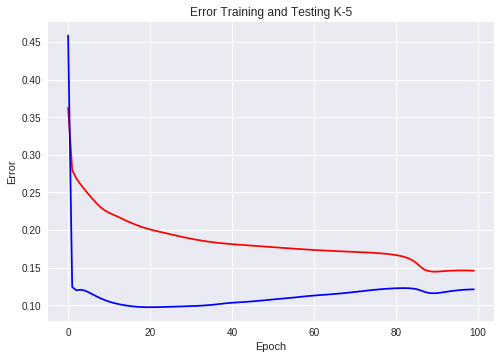

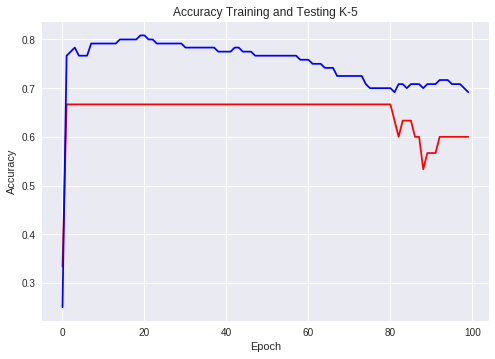

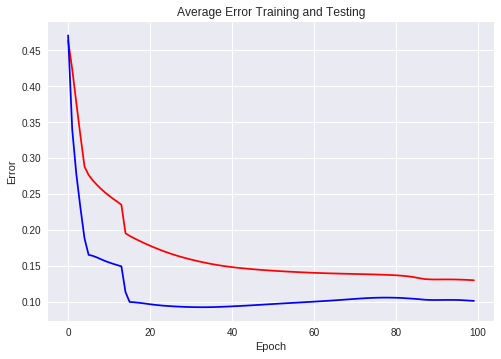

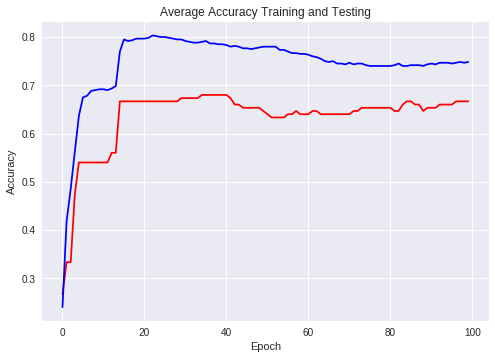

In [4]:
url='https://raw.githubusercontent.com/ahnafalfariza/Machine-Learning/master/Task%203/iris-modified.csv'
#url="iris-modified.csv"
originData = get_data(url)
originTarget = get_target(url)
l_rate = 0.1
epoch = 100
k = 5

kfold(k,originData,originTarget,epoch,l_rate)

avgErrorTest = getAverage(errorTest)
avgErrorTrain = getAverage(errorTrain)
avgAccuracyTest = getAverage(accuracyTest)
avgAccuracyTrain = getAverage(accuracyTrain)

for i in range(5):
    plt.plot(range(0,epoch),errorTest[i], label='Error Test', color='red')
    plt.plot(range(0,epoch),errorTrain[i], label='Error Train', color='blue')
    plt.title('Error Training and Testing K-%s' %(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()

    plt.plot(range(0,epoch),accuracyTest[i], label='Accuracy Test', color='red')
    plt.plot(range(0,epoch),accuracyTrain[i], label='Accuracy Train', color='blue')
    plt.title('Accuracy Training and Testing K-%s' %(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

plt.plot(range(0,epoch),avgErrorTest, label='Avg Error Test', color='red')
plt.plot(range(0,epoch),avgErrorTrain, label='Avg Error Train', color='blue')
plt.title('Average Error Training and Testing')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

plt.plot(range(0,epoch),avgAccuracyTest, label='Avg Accuracy Test', color='red')
plt.plot(range(0,epoch),avgAccuracyTrain, label='Avg Accuracy Train', color='blue')
plt.title('Average Accuracy Training and Testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()